In [53]:
# import all necessary python packages here
# for data structures and manipulation

import numpy as np # for mathematical caluclations
import pandas as pd 
import datetime  # to access datetime

# for data visualization
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px # for interactive plotting
import plotly.graph_objects as go # for interactive plotting

# set the plot style in matplotlib to ggplot and the firgure size to 15x5## Augmented Dickey Fuller Test for Assessing Stationarity
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (15,15)

# for ingnoring warnings
import warnings # to ignore warning
warnings.filterwarnings('ignore')

I want to answer the following questions:
<br>- Do wards translate to wins?
<br>- Baron or dragon prioritization for wins?
<br>- Prioritization of kills or creep score for a win?

In [22]:
# importing the data
df = pd.read_csv('League of Legends 2021 World Championship Play-In Groups Statistics - Raw Data.csv')
df.head()

,Team,Player,Opponent,Position,Champion,Kills,Deaths,Assists,Creep Score,Gold Earned,Champion Damage Share,Kill Participation,Wards Placed,Wards Destroyed,Ward Interactions,Dragons For,Dragons Against,Barons For,Barons Against,Result
0,UOL,Boss,GS,Top,Camille,4,5,3,188,11107,0.17,0.78,8,8,16,0,4,0,1,L
1,GS,Crazy,UOL,Top,Gwen,3,1,9,217,12201,0.20,0.52,10,7,17,4,0,1,0,W
2,UOL,Ahahacik,GS,Jungle,Trundle,2,4,5,156,9048,0.15,0.78,8,14,22,0,4,0,1,L
3,GS,Mojito,UOL,Jungle,Talon,5,4,10,194,11234,0.23,0.65,12,8,20,4,0,1,0,W
4,UOL,Nomanz,GS,Mid,Leblanc,1,3,4,216,9245,0.29,0.56,6,9,15,0,4,0,1,L


In [23]:
# checking the columns
df.columns

Index(['Team', 'Player', 'Opponent', 'Position', 'Champion', 'Kills', 'Deaths',
       'Assists', 'Creep Score', 'Gold Earned', 'Champion Damage Share',
       'Kill Participation', 'Wards Placed', 'Wards Destroyed',
       'Ward Interactions', 'Dragons For', 'Dragons Against', 'Barons For',
       'Barons Against', 'Result'],
      dtype='object')

In [24]:
# checking the types of data and if there are any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Team                   220 non-null    object 
 1   Player                 220 non-null    object 
 2   Opponent               220 non-null    object 
 3   Position               220 non-null    object 
 4   Champion               220 non-null    object 
 5   Kills                  220 non-null    int64  
 6   Deaths                 220 non-null    int64  
 7   Assists                220 non-null    int64  
 8   Creep Score            220 non-null    int64  
 9   Gold Earned            220 non-null    int64  
 10  Champion Damage Share  220 non-null    float64
 11  Kill Participation     220 non-null    float64
 12  Wards Placed           220 non-null    int64  
 13  Wards Destroyed        220 non-null    int64  
 14  Ward Interactions      220 non-null    int64  
 15  Dragon

In [26]:
# adding a column ('Result T/F') where 'W' = True and 'L' = False
df['Result T/F'] = [True if i == 'W' else False for i in df['Result']]

In [27]:
df.head()

,Team,Player,Opponent,Position,Champion,Kills,Deaths,Assists,Creep Score,Gold Earned,...,Kill Participation,Wards Placed,Wards Destroyed,Ward Interactions,Dragons For,Dragons Against,Barons For,Barons Against,Result,Result T/F
0,UOL,Boss,GS,Top,Camille,4,5,3,188,11107,...,0.78,8,8,16,0,4,0,1,L,False
1,GS,Crazy,UOL,Top,Gwen,3,1,9,217,12201,...,0.52,10,7,17,4,0,1,0,W,True
2,UOL,Ahahacik,GS,Jungle,Trundle,2,4,5,156,9048,...,0.78,8,14,22,0,4,0,1,L,False
3,GS,Mojito,UOL,Jungle,Talon,5,4,10,194,11234,...,0.65,12,8,20,4,0,1,0,W,True
4,UOL,Nomanz,GS,Mid,Leblanc,1,3,4,216,9245,...,0.56,6,9,15,0,4,0,1,L,False


In [28]:
# dropping the 'Result' column to stop redundancies 
df = df.drop(columns = 'Result')

In [30]:
df

,Team,Player,Opponent,Position,Champion,Kills,Deaths,Assists,Creep Score,Gold Earned,Champion Damage Share,Kill Participation,Wards Placed,Wards Destroyed,Ward Interactions,Dragons For,Dragons Against,Barons For,Barons Against,Result T/F
0,UOL,Boss,GS,Top,Camille,4,5,3,188,11107,0.17,0.78,8,8,16,0,4,0,1,False
1,GS,Crazy,UOL,Top,Gwen,3,1,9,217,12201,0.20,0.52,10,7,17,4,0,1,0,True
2,UOL,Ahahacik,GS,Jungle,Trundle,2,4,5,156,9048,0.15,0.78,8,14,22,0,4,0,1,False
3,GS,Mojito,UOL,Jungle,Talon,5,4,10,194,11234,0.23,0.65,12,8,20,4,0,1,0,True
4,UOL,Nomanz,GS,Mid,Leblanc,1,3,4,216,9245,0.29,0.56,6,9,15,0,4,0,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,BYG,Maoan,UOL,Mid,Ryze,4,4,2,356,15558,0.23,0.32,24,6,30,4,1,1,1,True
216,UOL,Argonavt,BYG,Adc,Senna,1,3,9,58,9554,0.16,0.71,35,16,51,1,4,1,1,False
217,BYG,Doggo,UOL,Adc,Draven,10,2,4,353,20546,0.38,0.74,15,5,20,4,1,1,1,True
218,UOL,Santas,BYG,Support,Wukong,0,4,7,200,10354,0.11,0.50,16,8,24,1,4,1,1,False


In [40]:
df['K/D Ratio'] = round(df['Kills']/df['Deaths'], 2)
df['Net Ward Interaction'] = df['Wards Destroyed']/df['Ward Interactions']
df['Dragon Score'] = df['Dragons For'] - df['Dragons Against']
df['Baron Score'] = df['Barons For'] - df['Barons Against']

In [46]:
df.columns

Index(['Team', 'Player', 'Opponent', 'Position', 'Champion', 'Kills', 'Deaths',
       'Assists', 'Creep Score', 'Gold Earned', 'Champion Damage Share',
       'Kill Participation', 'Wards Placed', 'Wards Destroyed',
       'Ward Interactions', 'Dragons For', 'Dragons Against', 'Barons For',
       'Barons Against', 'Result T/F', 'K/D Ratio', 'Net Ward Interaction',
       'Dragon Score', 'Baron Score'],
      dtype='object')

In [47]:
column_names = ['Team', 'Player', 'Opponent', 'Position', 'Champion', 'Kills', 'Deaths',
       'Assists', 'K/D Ratio', 'Creep Score', 'Gold Earned', 'Champion Damage Share',
       'Kill Participation', 'Wards Placed', 'Wards Destroyed',
       'Ward Interactions', 'Net Ward Interaction', 'Dragons For', 'Dragons Against', 'Dragon Score', 
       'Barons For', 'Barons Against', 'Baron Score', 'Result T/F']

In [50]:
df = df.reindex(columns = column_names)

In [51]:
df_corr = df.corr()

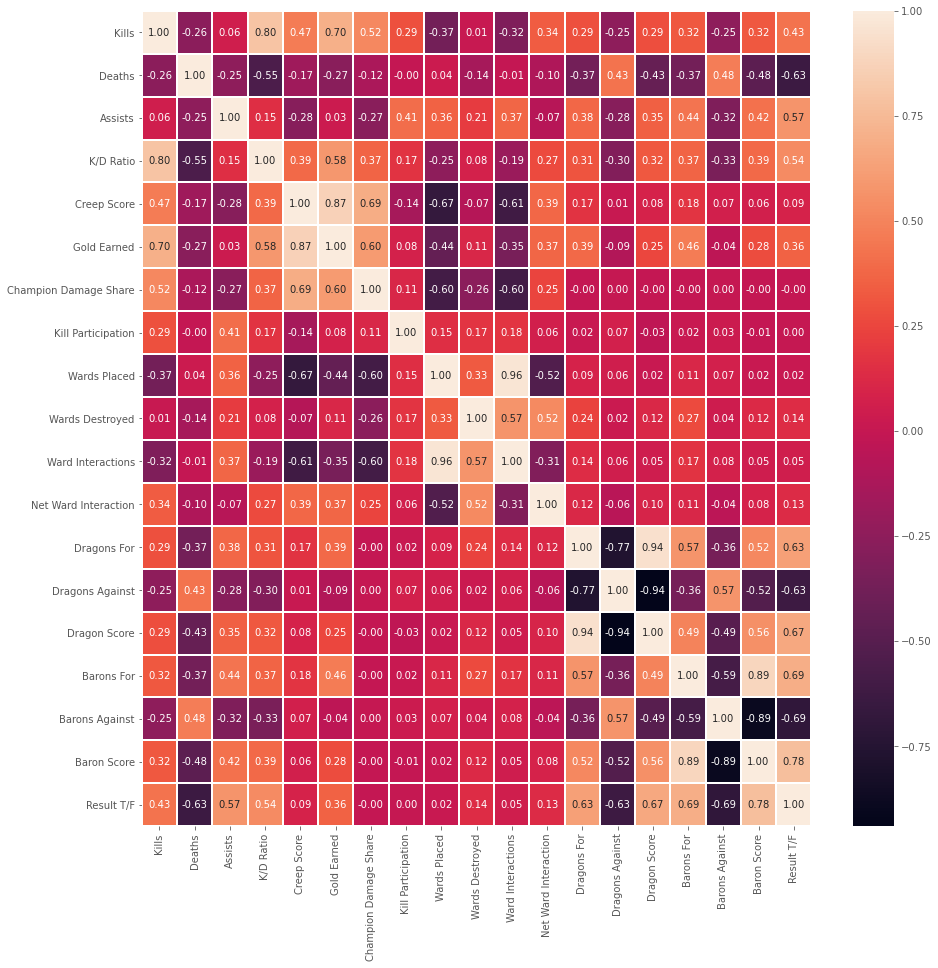

In [59]:
cor_matrix = df.corr()

sns.heatmap(cor_matrix,
 annot = True, linewidths = 1, fmt = '.2f')

plt.show()

To answer the questions at the beginning: 
<br>- Do wards translate to wins? Destorying wards seem to have a greater impact on wins than wards placed or ward interaction
<br>- Baron or dragon prioritization for wins? Prioritizing Baron over dragon seems to have a greater impact on winning 
<br>- Prioritization of kills or creep score for a win? Prioritizing kills over creep score has a greater impact on winning

Other interesting findings:
<br>- Prioritizing K/D Ratio over kills leads to more wins
<br>- While gold earned primairly comes from creep score, it is kills that win you more games
<br>- Teams that focus on dragon also focus on baron vice versa
<br>- Higher net ward interaction leads to higher K/D ratio